In [1]:
import numpy as np
import scipy
import scipy.signal 
import h5py
import matplotlib.pyplot as plt

In [2]:
data={'ActivPark': h5py.File('L23_f09_as_PARK.mat','r'), 
      'SWAPark': h5py.File('L23_f03_swa_PARK.mat','r'), 
     'ActivCtl': h5py.File('A9_c05_as_CTL.mat','r'), 
     'SWACtl': h5py.File('A9_c01_swa_CTL.mat','r')} 
# Look at the variable names in each data file
for key,value in data.items():
    print(key)
    print(data[key].keys())

ActivPark
<KeysViewHDF5 ['L23_Beat_cycl', 'L23_Beta_EEG', 'L23_EEGipsi', 'L23_Pr18_c08', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_Pr26_c12', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_3', 'L23_SS_Pr_7', 'L23_SS_Pr_9']>
SWAPark
<KeysViewHDF5 ['L23_EEGipsi', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr23_c0F', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_7']>
ActivCtl
<KeysViewHDF5 ['A9_EEGipsi', 'A9_P2021_c10', 'A9_P2021_c11', 'A9_Pr10_c0C', 'A9_Pr10_c0D', 'A9_Pr10_c0E', 'A9_Pr17_c01', 'A9_Pr17_c10', 'A9_Pr1_c01', 'A9_Pr22_c12', 'A9_Pr22_c13', 'A9_Pr2_c02', 'A9_Pr2_c1B', 'A9_Pr6_c05', 'A9_Pr8_c07', 'A9_Pr8_c08', 'A9_SS_Pr_25', 'A9_SS_Pr_3', 'A9_SS_Pr_4', 'A9_SS_Pr_9']>
SWACtl
<KeysViewHDF5 ['A9_EEGipsi', 'A9_P2021_c10', 'A9_P2021_c11', 'A9_Pr10_c0C', 'A9_Pr10_c0D', 'A9_Pr10_c0E',

In [3]:
# Look up variable in a specific dataset
dict(data['ActivPark']['L23_Pr20_c09'])

{'comment': <HDF5 dataset "comment": shape (33, 1), type "<u2">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'resolution': <HDF5 dataset "resolution": shape (1, 1), type "<f8">,
 'times': <HDF5 dataset "times": shape (1, 725), type "<f8">,
 'title': <HDF5 dataset "title": shape (8, 1), type "<u2">}

In [4]:
# Select a few datasets to work with: EEG and 3 spike trains from parkinsonian animals in 'activated state'
EEG=data['ActivPark']['L23_EEGipsi']
ST1=data['ActivPark']['L23_Pr20_c09']
ST2=data['ActivPark']['L23_Pr20_c0A']
ST3=data['ActivPark']['L23_Pr20_c0B']
dict(EEG)

{'comment': <HDF5 dataset "comment": shape (10, 1), type "<u2">,
 'interval': <HDF5 dataset "interval": shape (1, 1), type "<f8">,
 'length': <HDF5 dataset "length": shape (1, 1), type "<f8">,
 'offset': <HDF5 dataset "offset": shape (1, 1), type "<f8">,
 'scale': <HDF5 dataset "scale": shape (1, 1), type "<f8">,
 'start': <HDF5 dataset "start": shape (1, 1), type "<f8">,
 'title': <HDF5 dataset "title": shape (7, 1), type "<u2">,
 'units': <HDF5 dataset "units": shape (2, 1), type "<u2">,
 'values': <HDF5 dataset "values": shape (1, 35715), type "<f8">}

In [5]:
# Find the number of sampling points in EEG trace (EEG[values])


EEG_values=EEG['values'][0]

y=len(EEG_values)
print(y)


EEG_interval=EEG['interval'][0]
print(EEG_interval)

EEG_units=EEG['units'][0]
print(EEG_units)

35715
[0.0028]
[109]


In [6]:
# Find the duration of the recording as number of points time sampling interval (EEG[interval])

duration = y * EEG_interval
print(duration)

frequency = 1 / EEG_interval
print(frequency)

[100.002]
[357.14285714]


(0.0, 1000.0)

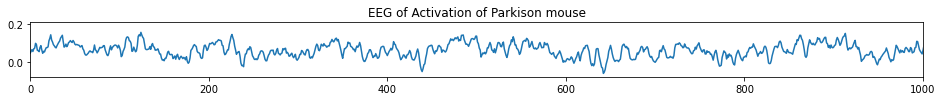

In [7]:
# Look up the 1000 first points in EEG trace
T=np.linspace(0, duration, num=y)
#print(T)
plt.figure(figsize=(16,1))
plt.plot(EEG_values)
plt.title('EEG of Activation of Parkison mouse')
plt.xlim(0,1000)


[100.002]
[100.00004]
[100.00032]
[100.00032]


Text(0.5, 1.0, 'EEG of slow wave activity of control mouse')

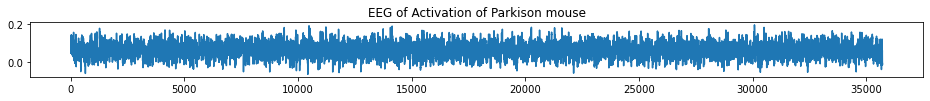

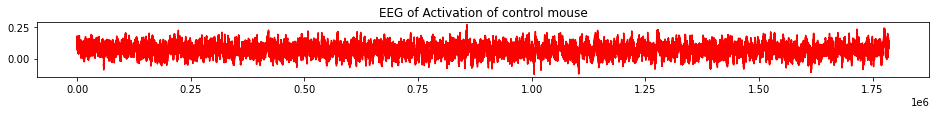

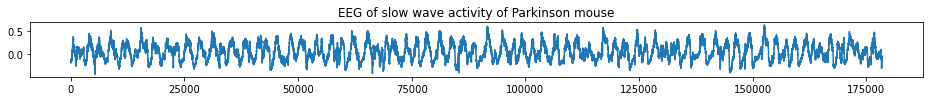

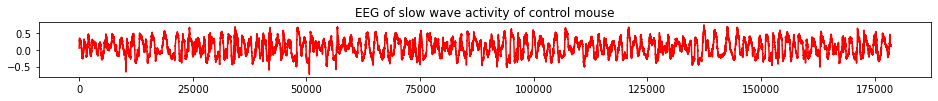

In [43]:
# Parkinson Activation

EEG=data['ActivPark']['L23_EEGipsi']
EEG_values=EEG['values'][0]
EEG_interval=EEG['interval'][0]

duration = len(EEG_values) * EEG_interval
print(duration)
T=np.linspace(0, duration, num=len(EEG_values))
plt.figure(figsize=(16,1))
plt.plot(EEG_values)
plt.title('EEG of Activation of Parkison mouse')
#plt.xlim(0,1000)


# Control Activation

EEG_ctl=data['ActivCtl']['A9_EEGipsi']
EEG_values_ctl=EEG_ctl['values'][0]
EEG_interval_ctl=EEG_ctl['interval'][0] 

duration2 = len(EEG_values_ctl) * EEG_interval_ctl
print(duration2)
T=np.linspace(0, duration2, num=len(EEG_values_ctl))
plt.figure(figsize=(16,1))
plt.plot(EEG_values_ctl,'r')
plt.title('EEG of Activation of control mouse')
#plt.xlim(0,10000)


# Parkinson Slow Wave Activity

EEG_SWA=data['SWAPark']['L23_EEGipsi']
EEG_values_SWA=EEG_SWA['values'][0]                     
EEG_interval_SWA=EEG_SWA['interval'][0] 

duration3 = len(EEG_values_SWA) * EEG_interval_SWA
print(duration3)
T=np.linspace(0, duration3, num=len(EEG_values_SWA))
plt.figure(figsize=(16,1))
plt.plot(EEG_values_SWA)
plt.title('EEG of slow wave activity of Parkinson mouse')
#plt.xlim(0,1000)


# Control Slow wave activity

EEG_SWA_ctl=data['SWACtl']['A9_EEGipsi']
EEG_values_SWA_ctl=EEG_SWA_ctl['values'][0]                     
EEG_interval_SWA_ctl=EEG_SWA_ctl['interval'][0]


duration4 = len(EEG_values_SWA_ctl) * EEG_interval_SWA_ctl
print(duration4)
T=np.linspace(0, duration4, num=len(EEG_values_SWA_ctl))
plt.figure(figsize=(16,1))
plt.plot(EEG_values_SWA_ctl,'r')
plt.title('EEG of slow wave activity of control mouse')
#plt.xlim(0,1000)

[100.00004]


(0.0, 1000.0)

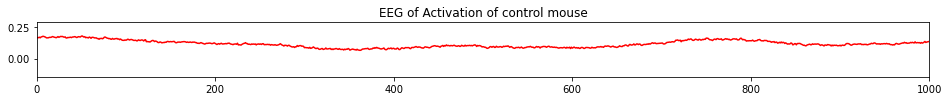

In [9]:
# Control Activation

EEG_ctl=data['ActivCtl']['A9_EEGipsi']
EEG_values_ctl=EEG_ctl['values'][0]
EEG_interval_ctl=EEG_ctl['interval'][0] 

duration2 = len(EEG_values_ctl) * EEG_interval_ctl
print(duration2)
T=np.linspace(0, duration2, num=len(EEG_values_ctl))
plt.figure(figsize=(16,1))
plt.plot(EEG_values_ctl,'r')
plt.title('EEG of Activation of control mouse')
plt.xlim(0,1000)

[357.14285714]


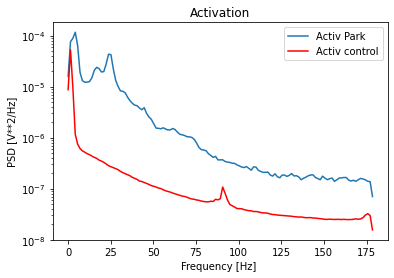

In [10]:
# Compute the spectral power density histogram (spectrum) of the EEG trace using scipy.signal.welch
# Elle représente la répartition fréquentielle de la puissance d'un signal suivant les fréquences qui le composent (son unité est de la forme Ux2/Hz, où Ux représente l'unité physique du signal x, soit par exemple V2/Hz). Elle sert à caractériser les signaux aléatoires gaussiens stationnaires et ergodiques et se révèle indispensable à la quantification des bruits électroniques

#Parkison Activation

EEG=data['ActivPark']['L23_EEGipsi']
EEG_values=EEG['values'][0]

EEG_interval=EEG['interval'][0]
frequency = 1 / EEG_interval
print(frequency)

f, psd = scipy.signal.welch(EEG_values, fs=357, nperseg= 256)
plt.semilogy(f, psd,label='Activ Park')

plt.title('Activation')
plt.xlabel('Frequency [Hz] ')
plt.ylabel('PSD [V**2/Hz]')

#control Activation

EEG_ctl=data['ActivCtl']['A9_EEGipsi']
EEG_values_ctl=EEG_ctl['values'][0]

EEG_interval_ctl=EEG_ctl['interval'][0]                      
frequency_ctl = 1 / EEG_interval_ctl
#print(frequency_ctl)    

f, psd = scipy.signal.welch(EEG_values_ctl, fs=357, nperseg= 256)
plt.semilogy(f, psd,'r',label='Activ control')

plt.xlabel('Frequency [Hz] ')
plt.ylabel('PSD [V**2/Hz]')


plt.legend()
plt.show()


#plt.hist(psd , bins=50)
#plt.title('PSD: power spectral density')
#plt.xlabel('current (mA) ')
#plt.ylabel('Count')


[1785.71428571]


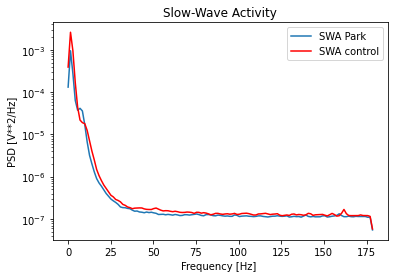

In [11]:
# Parkinson Slow wave activity


EEG_SWA=data['SWAPark']['L23_EEGipsi']
EEG_values_SWA=EEG_SWA['values'][0]
                      
EEG_interval_SWA=EEG_SWA['interval'][0]                      
frequency_SWA = 1 / EEG_interval_SWA
print(frequency_SWA)                      
                      
f, psd = scipy.signal.welch(EEG_values_SWA, fs=357, nperseg= 256)
plt.semilogy(f, psd,label='SWA Park')
plt.title('Slow-Wave Activity')
plt.xlabel('Frequency [Hz] ')
plt.ylabel('PSD [V**2/Hz]')


#control Slow wave activity

EEG_SWA_ctl=data['SWACtl']['A9_EEGipsi']
EEG_values_SWA_ctl=EEG_SWA_ctl['values'][0]
                      
EEG_interval_SWA_ctl=EEG_SWA_ctl['interval'][0]                      
frequency_SWA_ctl = 1 / EEG_interval_SWA_ctl
#print(frequency_SWA_ctl)                      
                      
f, psd = scipy.signal.welch(EEG_values_SWA_ctl, fs=357, nperseg= 256)
plt.semilogy(f, psd,'r',label='SWA control')
plt.xlabel('Frequency [Hz] ')
plt.ylabel('PSD [V**2/Hz]')


plt.legend()
plt.show()

In [12]:
# Look up spike times for the two spike trains

ST1_times = ST1['times'][0]
print(ST1_times)
ST2_times = ST2['times'][0]
print(ST2_times)
ST3_times = ST3['times'][0]
print(ST3_times)


[1.57264000e-02 9.08224000e-02 1.01014400e-01 2.71926400e-01
 3.12022400e-01 3.54918400e-01 5.19670400e-01 5.58646400e-01
 6.48414400e-01 7.72006400e-01 8.05942400e-01 8.56958400e-01
 9.47846400e-01 1.00379040e+00 1.12049440e+00 1.12340640e+00
 1.32315840e+00 1.40105440e+00 1.48891840e+00 1.52061440e+00
 1.56681440e+00 1.71515840e+00 1.72064640e+00 1.78885440e+00
 1.81657440e+00 1.87005440e+00 1.98799040e+00 2.03743840e+00
 2.27062240e+00 2.33048640e+00 2.38738240e+00 2.41577440e+00
 2.47087840e+00 2.63988640e+00 2.69493440e+00 2.72651840e+00
 2.78677440e+00 2.84490240e+00 2.96978240e+00 3.10720640e+00
 3.20851040e+00 3.22239840e+00 3.29967840e+00 3.52715040e+00
 3.65320640e+00 3.71043840e+00 3.78581440e+00 3.84847840e+00
 3.88510240e+00 3.96109440e+00 3.99245440e+00 4.05159040e+00
 4.10831840e+00 4.14611840e+00 4.22160640e+00 4.31339040e+00
 4.38876640e+00 4.61612640e+00 4.67475840e+00 4.73288640e+00
 4.79151840e+00 4.87400640e+00 5.09067040e+00 5.17539840e+00
 5.18615040e+00 5.226470

In [13]:
# Make an instantaneous firing rate in bins of 1 ms using the function np.histogram
hist1, X = np.histogram(ST1_times, range = [0,100], bins =100000)
print(hist1)
print(np.sum(hist1))

hist2, X = np.histogram(ST2_times, range = [0,100], bins =100000)
print(hist2)
print(np.sum(hist2))

hist3, X = np.histogram(ST3_times, range = [0,100], bins =100000)
print(hist3)
print(np.sum(hist3))


[0 0 0 ... 0 0 0]
725
[0 0 0 ... 0 0 0]
1495
[0 0 0 ... 0 0 0]
2876


[357.14285714]


(-0.25, 0.25)

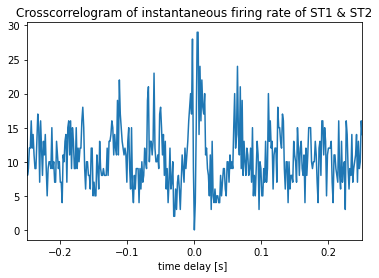

In [14]:
# 11 - Plot the crosscorrelogram of instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 for delays from -250ms to +250ms
##impedent of signal, in the window, create a gaussian , so you make a filter version.


frequency = 1 / EEG_interval
print(frequency)
C=scipy.signal.correlate(hist1, hist2, mode='full', method='auto')
T = .5*np.linspace(-len(hist1)/frequency, +len(hist1)/frequency , len(C))

plt.title('Crosscorrelogram of instantaneous firing rate of ST1 & ST2')
plt.xlabel('time delay [s] ')

plt.plot(T, C);
plt.xlim(-0.25,+0.25)



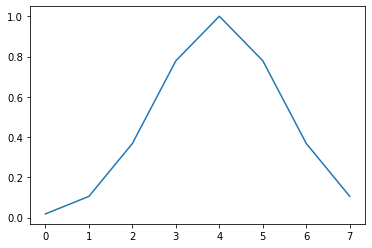

In [15]:
dt = 0.025
trange = int(dt*frequency)

# Standard deviation of the gaussian
sigma = trange/4

# Actual temporal window over which to compute the Gaussian
window = np.arange(-trange//2,trange//2)

# Gaussian function over window and standard deviation sigma
gaussian = np.exp(-(window/sigma)**2)
plt.plot(gaussian);

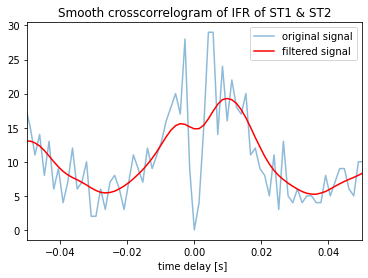

In [16]:
# 12 - Smooth the crosscorrelogram of instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 
# and plot for delays from -50ms to +50ms
##impedent of signal, in the window, create a gaussian , so you make a filter version.
dt = 0.05
trange = int(dt*frequency)

# Standard deviation of the gaussian
sigma = trange/4

# Actual temporal window over which to compute the Gaussian
window = np.arange(-trange//2,trange//2)

# Gaussian function over window and standard deviation sigma
gaussian = np.exp(-(window/sigma)**2)

E = np.convolve(np.abs(C), gaussian, mode='same') / gaussian.sum()


plt.title('Smooth crosscorrelogram of IFR of ST1 & ST2')
plt.xlabel('time delay [s] ')

plt.plot(T, C, alpha=0.5, label = 'original signal') # original signal
plt.plot(T, E,'r-', label='filtered signal');
plt.xlim(-0.05,0.05);
plt.legend()



[357.14285714]


(-0.25, 0.25)

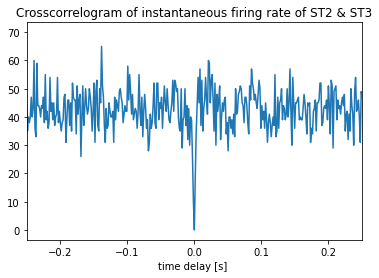

In [17]:
# Repeat the same procedure (cells 11 and 12) for spike trains 2 and 3
frequency = 1 / EEG_interval
print(frequency)
C=scipy.signal.correlate(hist2, hist3, mode='full', method='auto')
T = .5*np.linspace(-len(hist2)/frequency, +len(hist2)/frequency , len(C))

plt.title('Crosscorrelogram of instantaneous firing rate of ST2 & ST3')
plt.xlabel('time delay [s] ')
plt.plot(T, C);
plt.xlim(-0.25,+0.25)


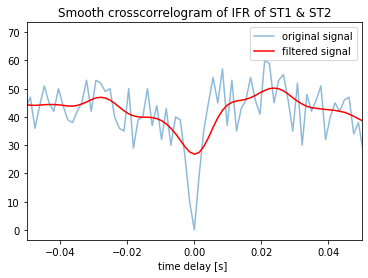

In [18]:
dt = 0.05
trange = int(dt*frequency)

# Standard deviation of the gaussian
sigma = trange/4

# Actual temporal window over which to compute the Gaussian
window = np.arange(-trange//2,trange//2)

# Gaussian function over window and standard deviation sigma
gaussian = np.exp(-(window/sigma)**2)

E = np.convolve(np.abs(C), gaussian, mode='same') / gaussian.sum()


plt.title('Smooth crosscorrelogram of IFR of ST1 & ST2')
plt.xlabel('time delay [s] ')
plt.plot(T, C, alpha=0.5, label = 'original signal') # original signal
plt.plot(T, E,'r-', label='filtered signal');
plt.xlim(-0.05,0.05);
plt.legend()

[357.14285714]


(-0.25, 0.25)

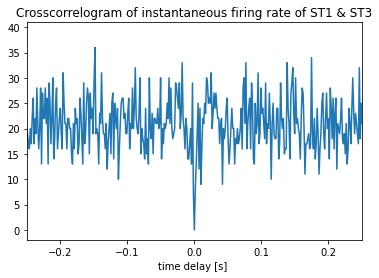

In [19]:
frequency = 1 / EEG_interval
print(frequency)
C=scipy.signal.correlate(hist1, hist3, mode='full', method='auto')
T = .5*np.linspace(-len(hist3)/frequency, +len(hist3)/frequency , len(C))

plt.title('Crosscorrelogram of instantaneous firing rate of ST1 & ST3')
plt.xlabel('time delay [s] ')
plt.plot(T, C);
plt.xlim(-0.25,+0.25)


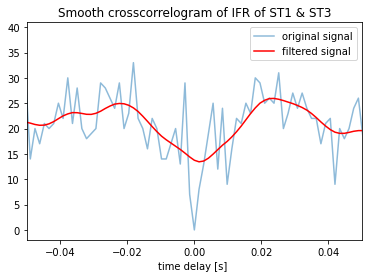

In [20]:
dt = 0.05
trange = int(dt*frequency)

# Standard deviation of the gaussian
sigma = trange/4

# Actual temporal window over which to compute the Gaussian
window = np.arange(-trange//2,trange//2)

# Gaussian function over window and standard deviation sigma
gaussian = np.exp(-(window/sigma)**2)

E = np.convolve(np.abs(C), gaussian, mode='same') / gaussian.sum()


plt.title('Smooth crosscorrelogram of IFR of ST1 & ST3')
plt.xlabel('time delay [s] ')
plt.plot(T, C, alpha=0.5,label = 'original signal') # original signal
plt.plot(T, E,'r-', label='filtered signal');
plt.xlim(-0.05,0.05);
plt.legend()

In [21]:
# Repeat the procedure (cell 11 and 12) for all pairs of spike trains recorded in this file (ActivPark)
# To this end, you may use the 'keys' of the dataset, corresponding to the various signals recorded simultaneously. 
# Note that the first 3 signals correspond to EEG or filtered EEG and will not be considered here. All other 
# recorded signals are spike trains 




['L23_Beat_cycl', 'L23_Beta_EEG', 'L23_EEGipsi', 'L23_Pr18_c08', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_Pr26_c12', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_3', 'L23_SS_Pr_7', 'L23_SS_Pr_9'] 19


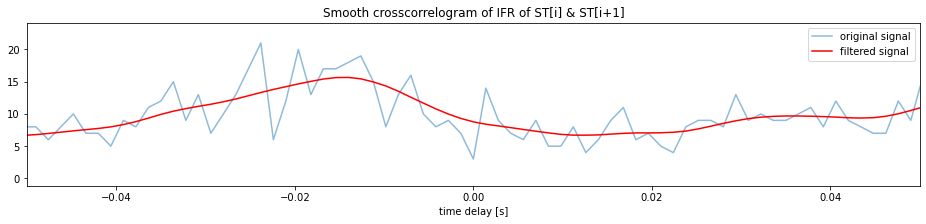

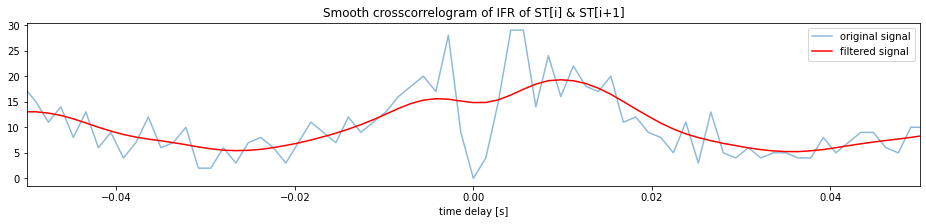

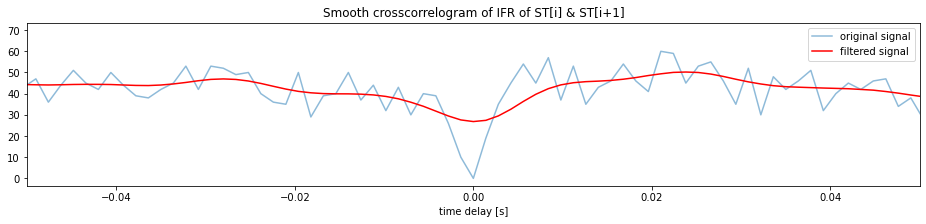

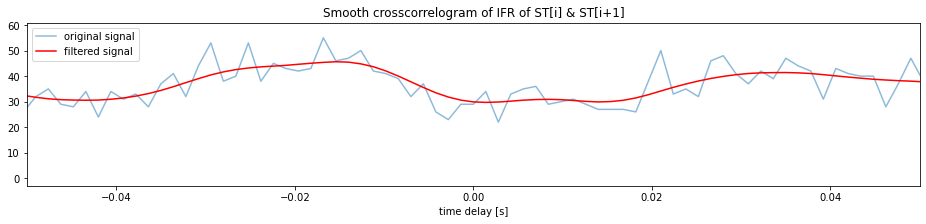

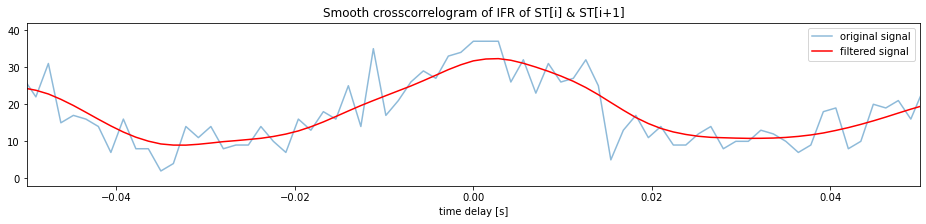

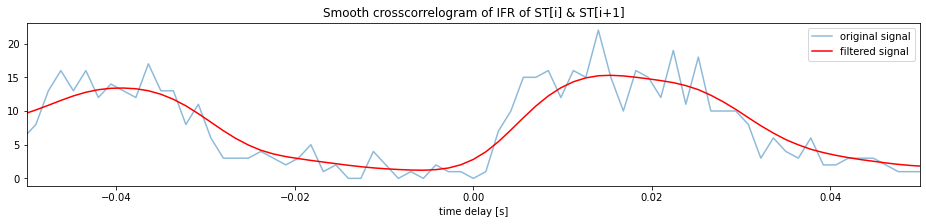

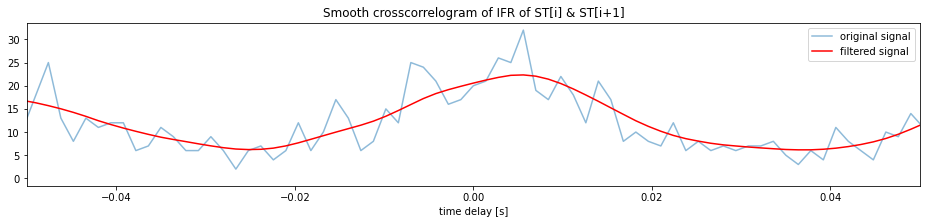

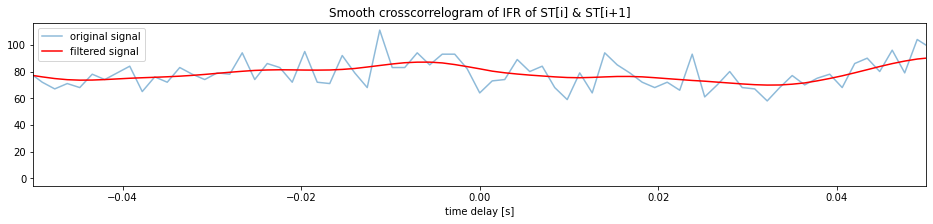

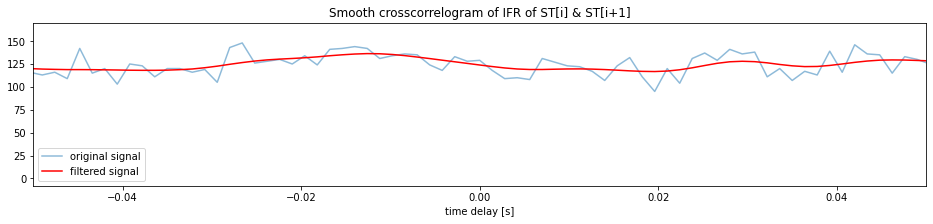

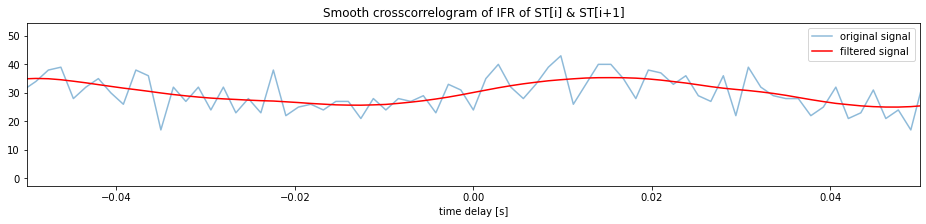

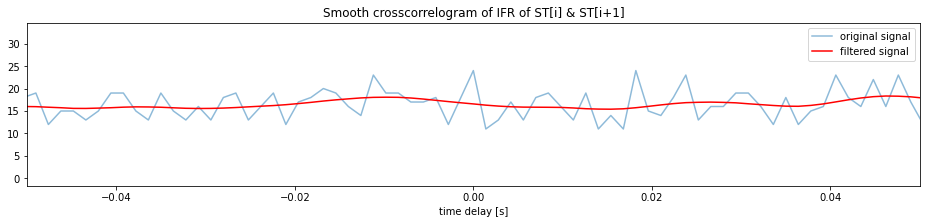

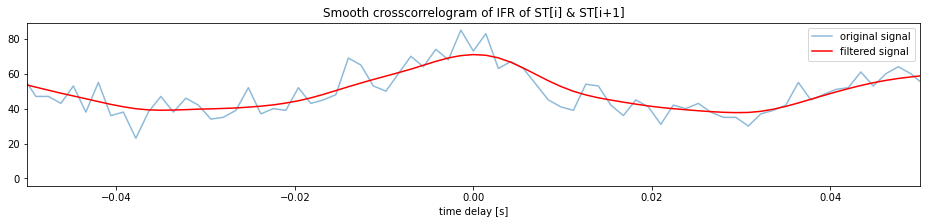

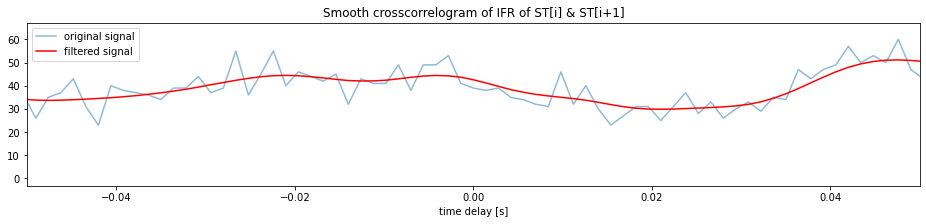

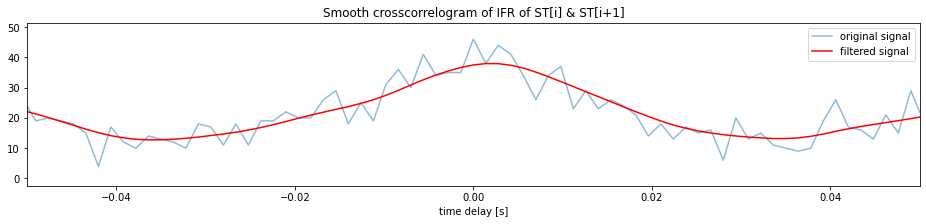

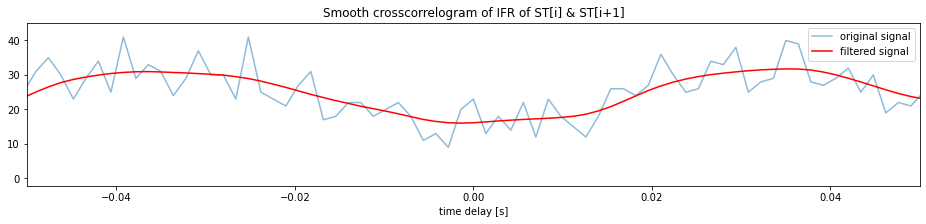

In [22]:
keys=list(data['ActivPark'].keys())
print(keys, len(keys))
frequency = 1 / EEG_interval
for i in range(3,18,1):
    ST1=data['ActivPark'][keys[i]]
    ST2=data['ActivPark'][keys[i+1]]
    ST1_times = ST1['times'][0]
    ST2_times = ST2['times'][0]
    hist1, bin1 =np.histogram(ST1_times, range = [0,100], bins =100000)
    hist2, bin2 =np.histogram(ST2_times, range = [0,100], bins =100000)
    C= scipy.signal.correlate(hist1, hist2, mode='full', method='auto')
    T = .5*np.linspace(-len(hist1)/frequency, +len(hist1)/frequency , len(C))
    #plt.plot(T,C);
    #plt.xlim(-0.25,+0.25)
    dt = 0.050
    trange = int(dt*frequency)
    sigma = trange/4 # Standard deviation of the gaussian
    window = np.arange(-trange//2,trange//2) # Actual temporal window over which to compute the Gaussian
    gaussian = np.exp(-(window/sigma)**2)# Gaussian function over window and standard deviation sigma
    E = np.convolve(np.abs(C), gaussian, mode='same') / gaussian.sum()
   
    plt.figure(figsize=(16,3))
    plt.title('Smooth crosscorrelogram of IFR of ST[i] & ST[i+1]')
    plt.xlabel('time delay [s]')
    plt.plot(T, C, alpha=0.5,label = 'original signal') # original signal
    plt.plot(T, E,'r-', label='filtered signal');
    plt.xlim(-0.05,0.05);
    plt.legend()

ValueError: x and y must have same first dimension, but have shapes (100001,) and (100000,)

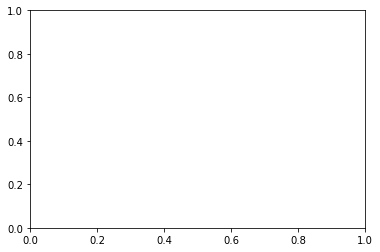

In [49]:
EEG=data['ActivPark']['L23_EEGipsi']
ST1=data['ActivPark']['L23_Pr20_c09']
ST2=data['ActivPark']['L23_Pr20_c0A']

ST1_times = ST1['times'][0]
ST2_times = ST2['times'][0]
hist1, bin1 =np.histogram(ST1_times, range = [0,100], bins =100000)
plt.plot(bin1,hist1)

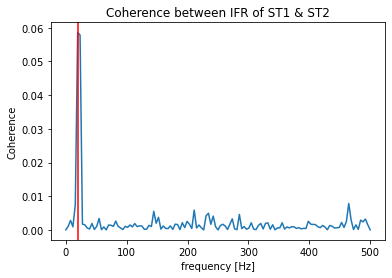

In [23]:
# Look at the coherence between instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 with function scipy.signal.coherence
frequency, coherence = scipy.signal.coherence(hist1, hist2, fs=1000, nperseg= 256)
#plt.semilogy(frequency, coherence)
plt.title('Coherence between IFR of ST1 & ST2')
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.plot(frequency, coherence)
#plt.show()
# Plot a vertical line at maximal coherence and get the corresponding frequency using the function plt.axvline
line= np.where(np.abs(coherence-max(coherence))<=0)
plt.axvline(x=frequency[line], ymin=0, ymax=1, color='red')

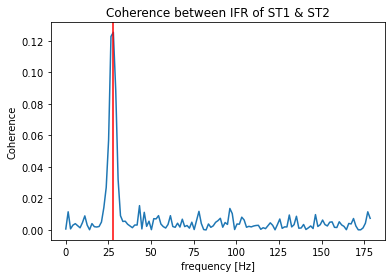

In [24]:
# We now want to compute the coherence between the EEG and the firing rates of single spike trains. 
# However, the coherence needs to be computed on signals that have the same sampling interval/rate

# First step: Recompute the IFR for a time bin similar to EEG sampling interval
# EEG_values=EEG['values'][0]
ST1_times = ST1['times'][0]
ST2_times = ST2['times'][0]
new_hist1, bin1 =np.histogram(ST1_times, range = [0,100], bins =28000)
new_hist2, bin2 =np.histogram(ST2_times, range = [0,100], bins =28000)

# Second step: Look at the coherence between instantaneous firing rate (IFR) of spike train 1 and IFR of spike train 2 with new time bin
# This coherence can compared to the one computed in cell 13.

frequency, coherence = scipy.signal.coherence(new_hist1, new_hist2, fs=357, nperseg= 256)
#plt.semilogy(frequency, coherence)
plt.title('Coherence between IFR of ST1 & ST2')
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.plot(frequency, coherence)


# Plot a vertical line at maximal coherence and get the corresponding frequency
line= np.where(np.abs(coherence-max(coherence))<=0)
plt.axvline(x=frequency[line], ymin=0, ymax=1, color='red')

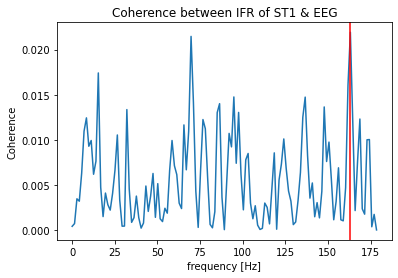

In [25]:
# Now we can compute the coherence between instantaneous firing rate (IFR) of a spike train and the EEG
EEG_values=EEG['values'][0]
ST1_times = ST1['times'][0]
new_hist1, bin1 =np.histogram(ST1_times, range = [0,100], bins =28000) # I'm not sure about the bins are correct or not
new_hist2, bin2 =np.histogram(EEG_values, range = [0,100], bins =28000)

frequency, coherence = scipy.signal.coherence(new_hist1, new_hist2, fs=357, nperseg= 256)
plt.title('Coherence between IFR of ST1 & EEG')
plt.xlabel('frequency [Hz]')
plt.ylabel('Coherence')
plt.plot(frequency, coherence)


# Plot a vertical line at maximal coherence and get the corresponding frequency
line= np.where(np.abs(coherence-max(coherence))<=0)
plt.axvline(x=frequency[line], ymin=0, ymax=1, color='red')


[357.14285714]


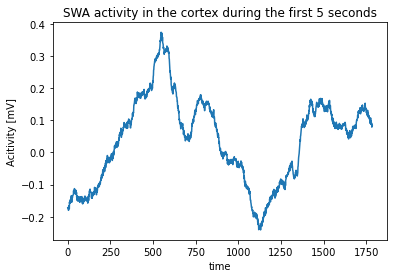

In [26]:
# Let's now look up a file with SWA activity in the cortex, and plot the 5 first seconds of this EEG
EEG_data=data['SWAPark']['L23_EEGipsi']
EEG_values=EEG_data['values'][0]
EEG_interval=EEG['interval'][0]
print(1/EEG_interval)


plt.title('SWA activity in the cortex during the first 5 seconds')
plt.xlabel('time')
plt.ylabel('Acitivity [mV]')
plt.plot(EEG_values[:int(5/EEG_interval)]);

In [27]:
# Build a band pass filter with [0.5 1.5] Hz band for EEG using scipy.signal.butter
def butter_bandpass(lowcut, highcut, fs, order):
    return scipy.signal.butter(order, [lowcut/(0.5*fs), highcut/(0.5*fs)], btype='band',output='sos')

[-0.17181396 -0.17318726 -0.17456055 ... -0.04707336 -0.04798889
 -0.03913879]
[-2.88499757e-15 -3.17250361e-14 -1.75865397e-13 ...  1.79736642e-01
  1.79873743e-01  1.80008370e-01]


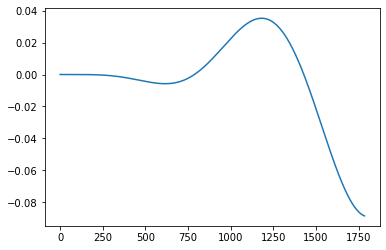

In [28]:
# Filter EEG with scipy.signal.filtfilt using the filter built in cell 18, and plot first 5 s of filtered EEG
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    sos = butter_bandpass(lowcut, highcut, fs, order)
    filtered_EEG = scipy.signal.sosfilt(sos, EEG_values) 
    return filtered_EEG

filtered_EEG = butter_bandpass_filter(EEG_values,0.5,1.5,1785,5)

print (EEG_values)
print(filtered_EEG)

#plot first 5 s of filtered EEG
plt.plot(filtered_EEG[:int(5/EEG_interval)])



3294
1.9998095999999999
98.0174096
-0.024225651780057977


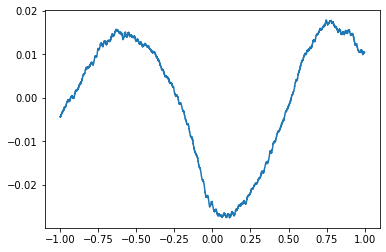

In [29]:
# Load one spike train and the EEG values and sampling interval from the SWAPark file
ST1=data['SWAPark']['L23_Pr20_c09'] 
ST1_times=ST1['times'][0]
print(len(ST1_times))

EEG=data['SWAPark']['L23_EEGipsi']
EEG_data=EEG['values'][0]
EEG_interval=EEG['interval'][0]


# Compute the spike-triggered average of the EEG trace with the first spike train

windowsec=2; windowint=windowsec/EEG_interval; 
t=np.arange(-windowsec/2,windowsec/2-EEG_interval,EEG_interval)
STA=np.zeros(int(windowint))
i1=np.argmin(np.abs(ST1_times-windowsec))
i2=np.argmin(np.abs(ST1_times-(len(EEG_data)*EEG_interval-windowsec)))
print(ST1_times[i1])
print(ST1_times[i2])
for i in range(i1,i2):
    STA += EEG_data[int(ST1_times[i+1]/EEG_interval)-int(windowint/2)-1:int(ST1_times[i+1]/EEG_interval)+int(windowint/2)]

STA=STA/(len(ST1_times)-2)
STA=STA-np.mean(STA)
plt.plot(t,STA);

# Value of the spike-triggered average at 0 time lag
print(STA[int(windowint/2)])


['L23_EEGipsi', 'L23_Pr20_c09', 'L23_Pr20_c0A', 'L23_Pr20_c0B', 'L23_Pr23_c0E', 'L23_Pr23_c0F', 'L23_Pr25_c10', 'L23_Pr25_c11', 'L23_SS_Pr_1', 'L23_SS_Pr_11', 'L23_SS_Pr_17', 'L23_SS_Pr_21', 'L23_SS_Pr_22', 'L23_SS_Pr_7'] 14
[0.00056]
1.9998095999999999
98.0174096
-0.024225651780057977
2.0050736
97.9933296
-0.07324562915552801
2.1664095999999997
97.94102559999999
0.10212848066337073
2.0056384
98.0552704
-0.056443753725938024
1.9509824
98.18468639999999
-0.08166482712028889
1.9972976
97.93061759999999
-0.06753157917015612
2.3952336
86.7896976
0.16198437342754568
2.2016576
98.0001296
0.15617695252435826
2.0170415999999998
97.9869296
-0.007583152533646213
3.0889488
96.52063679999999
-0.09443011284319613
1.9805472
98.1956032
-0.05386067485353443
1.9917487999999999
97.9929408
-0.056365244262851145
2.0074031999999997
98.11673119999999
-0.056936422244619825
[-0.024225651780057977, -0.07324562915552801, 0.10212848066337073, -0.056443753725938024, -0.08166482712028889, -0.06753157917015612, 0.1

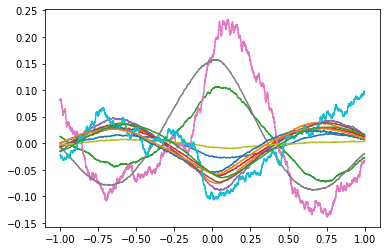

In [30]:
# Compute and plot the spike-triggered averages of the EEG with respect to all spike trains recorded in this SWAPark file
# You may use the keys of the data['SWAPark'] data set
# Save the value of the spike-triggered average at 0 time lag for all considered spike trains

keys=list(data['SWAPark'].keys())
print(keys, len(keys))

EEG=data['SWAPark']['L23_EEGipsi']
EEG_interval=EEG['interval'][0]
print(EEG_interval)

frequency = 1 / EEG_interval

oui = []

for i in range(1,14,1):
    ST1=data['SWAPark'][keys[i]]

    ST1_times = ST1['times'][0]
 
    windowsec=2; windowint=windowsec/EEG_interval; 
    t=np.arange(-windowsec/2,windowsec/2-EEG_interval,EEG_interval)
    STA=np.zeros(int(windowint))
    i1=np.argmin(np.abs(ST1_times-windowsec))
    i2=np.argmin(np.abs(ST1_times-(len(EEG_data)*EEG_interval-windowsec)))
    print(ST1_times[i1])
    print(ST1_times[i2])
    for i in range(i1,i2):
        STA += EEG_data[int(ST1_times[i+1]/EEG_interval)-int(windowint/2)-1:int(ST1_times[i+1]/EEG_interval)+int(windowint/2)]

    STA=STA/(len(ST1_times)-2)
    STA=STA-np.mean(STA)
    
    
    #plt.figure(figsize=(16,3))
    plt.plot(t,STA)

# Value of the spike-triggered average at 0 time lag
    STA_0 = STA[int(windowint/2)]
    print(STA_0)
    oui.append(STA_0)
                    
print(oui)

178572
[20.0004]
[0 0 0 ... 0 0 0]
670
0.0335
[0 0 0 ... 0 0 0]
401
0.02005
[0 0 0 ... 0 0 0]
198
0.0099
[0 0 0 ... 0 0 0]
542
0.0271
[0 0 0 ... 0 0 0]
195
0.00975
[0 0 0 ... 0 0 0]
743
0.03715
[0 0 0 ... 0 0 0]
2
0.0001
[0 0 0 ... 0 0 0]
331
0.01655
[0 0 0 ... 0 0 0]
798
0.0399
[0 0 0 ... 0 0 0]
9
0.00045
[0 0 0 ... 0 0 0]
329
0.01645
[0 0 0 ... 0 0 0]
646
0.0323
[0 0 0 ... 1 0 0]
818
0.0409
[0.0335, 0.02005, 0.0099, 0.0271, 0.00975, 0.03715, 0.0001, 0.01655, 0.0399, 0.00045, 0.01645, 0.0323, 0.0409]


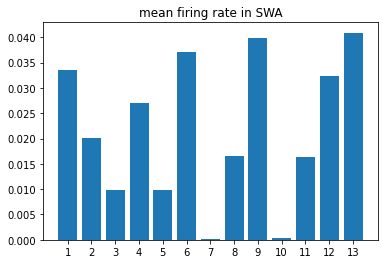

In [31]:
# For each spike train in the data set, compute the mean firing rate 

EEG=data['SWAPark']['L23_EEGipsi']
EEG_values=EEG['values'][0]
EEG_interval=EEG['interval'][0]

y2=len(EEG_values)
print(y2)
duration2 = y * EEG_interval
print(duration2)

IFR = []

for i in range(1,14,1):
    ST1=data['SWAPark'][keys[i]]

    ST1_times = ST1['times'][0]
 

    hist1, X = np.histogram(ST1_times, range = [0,20], bins =20000)
    print(hist1)
    print(np.sum(hist1))
    
    mean_firing_rate = np.sum(hist1)/len(hist1)
    print(mean_firing_rate)
    IFR.append(mean_firing_rate)

print(IFR)
    
#list(np.float_(IFR))    
#mean_IFR = np.mean(IFR)
#print(mean_IFR)


#plt.plot(mean_IFR)
#names = ['SWA', 'B', 'C'] # nom des barres
#values = [mean_IFR, 0.5, 0.2]
#plt.bar(names, values) ; plt.show()

names = ['1', '2', '3','4','5','6','7','8','9','10','11','12','13'] # nom des barres
#values = [, 0.5, 0.2]
plt.bar(names, IFR) ; 
plt.title('mean firing rate in SWA')

plt.show()






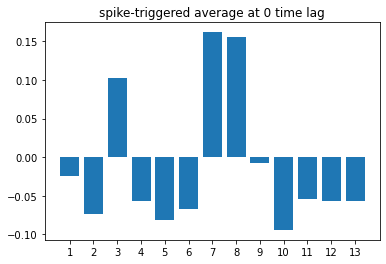

In [32]:
# Plot the mean firing rate of the spike trains vs the value of the spike-triggered average at 0 time lag

names = ['1', '2', '3','4','5','6','7','8','9','10','11','12','13'] # nom des barres
#values = [[-0.024225651780057977, -0.07324562915552801, 0.10212848066337073, -0.056443753725938024, -0.08166482712028889, -0.06753157917015612, 0.16198437342754568, 0.15617695252435826, -0.007583152533646213, -0.09443011284319613, -0.05386067485353443, -0.056365244262851145]
plt.bar(names, oui) ; 
plt.title('spike-triggered average at 0 time lag')



plt.show()

[1785.71428571]
[-1.90737015e-03 -3.02981095e-03 -3.49812634e-03 -6.34430827e-03
 -4.76320829e-03  2.06540776e-05  3.29889109e-03 -1.54342480e-03
 -5.04574770e-03 -1.74145229e-03  2.35775457e-03 -4.48681293e-03
 -8.88315769e-03  1.27637342e-03 -3.29601836e-03 -3.09341787e-03
  2.28985254e-04  9.00290203e-03  5.93539342e-03 -9.60579258e-03
 -4.48277521e-03 -2.25591745e-04  1.41270907e-03 -3.77823478e-03
 -9.90829158e-04]


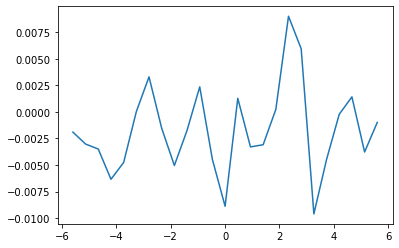

In [33]:
# Plot the mean firing rate of the spike trains vs the value of the spike-triggered average at 0 time lag


frequency = 1 / EEG_interval
print(frequency)
C=scipy.signal.correlate(IFR, oui, mode='full', method='auto')
print(C)
T = .5*np.linspace(-len(hist1)/frequency, +len(hist1)/frequency , len(C))
plt.plot(T, C);


In [34]:
STA=oui
print(STA)


[-0.024225651780057977, -0.07324562915552801, 0.10212848066337073, -0.056443753725938024, -0.08166482712028889, -0.06753157917015612, 0.16198437342754568, 0.15617695252435826, -0.007583152533646213, -0.09443011284319613, -0.05386067485353443, -0.056365244262851145, -0.056936422244619825]


In [35]:
plt.histogram(oui, IFR)

AttributeError: module 'matplotlib.pyplot' has no attribute 'histogram'